In [1]:
import komm

In [2]:
code1 = komm.FixedToVariableCode.from_codewords(4, [(0, 0), (0, 1), (1, 0), (1, 1)])
code2 = komm.FixedToVariableCode.from_codewords(4, [(1,), (0, 1), (0, 0, 0), (0, 0, 1)])
code3 = komm.FixedToVariableCode.from_codewords(
    4, [(0,), (0, 1), (0, 1, 1), (0, 1, 1, 1)]
)
code4 = komm.FixedToVariableCode.from_codewords(4, [(0,), (1,), (0, 0), (1, 1)])

In [3]:
print("Code 1 is uniquely decodable\t", code1.is_uniquely_decodable())
print("Code 1 is prefix free\t\t", code1.is_prefix_free(), "\n")

print("Code 2 is uniquely decodable\t", code2.is_uniquely_decodable())
print("Code 2 is prefix free\t\t", code2.is_prefix_free(), "\n")

print("Code 3 is uniquely decodable\t", code3.is_uniquely_decodable())
print("Code 3 is prefix free\t\t", code3.is_prefix_free(), "\n")

print("Code 4 is uniquely decodable\t", code4.is_uniquely_decodable())
print("Code 4 is prefix free\t\t", code4.is_prefix_free())

Code 1 is uniquely decodable	 True
Code 1 is prefix free		 True 

Code 2 is uniquely decodable	 True
Code 2 is prefix free		 True 

Code 3 is uniquely decodable	 True
Code 3 is prefix free		 False 

Code 4 is uniquely decodable	 False
Code 4 is prefix free		 False


In [8]:
word = [1, 0, 1, 0, 2, 0]

print("Palavra original", word, "\n")

encoded1 = code1.encode(word)
decoded1 = code1.decode(encoded1)
print("Code 1 encode", code1.encode(word))
print("Code 1 decode", code1.decode(encoded1), "\n")

encoded2 = code2.encode(word)
decoded2 = code2.decode(encoded2)
print("Code 2 encode", encoded2)
print("Code 2 decode", decoded2, "\n")

encoded3 = code3.encode(word)
# decoded3 = code3.decode(encoded3) # Erro não implementado para não p.f.
print("Code 3 encode", encoded3)
# print("Code 3 decode", decoded3, "\n")

Palavra original [1, 0, 1, 0, 2, 0] 

Code 1 encode [0 1 0 0 0 1 0 0 1 0 0 0]
Code 1 decode [1 0 1 0 2 0] 

Code 2 encode [0 1 1 0 1 1 0 0 0 1]
Code 2 decode [1 0 1 0 2 0] 

Code 3 encode [0 1 0 0 1 0 0 1 1 0]


In [5]:
pmf = [1 / 2, 1 / 4, 1 / 8, 1 / 8]

rate1 = code1.rate(pmf)
print("Code 1 rate", rate1)

rate2 = code2.rate(pmf)
print("Code 2 rate", rate2)

rate3 = code3.rate(pmf)
print("Code 3 rate", rate3)

rate4 = code4.rate(pmf)
print("Code 4 rate", rate4)

Code 1 rate 2.0
Code 2 rate 1.75
Code 3 rate 1.875
Code 4 rate 1.25


In [6]:
dms = komm.DiscreteMemorylessSource(pmf)
text = dms(10000)

In [10]:
bits1 = code1.encode(text)
print("Code 1 encoded length", len(bits1))

bits2 = code2.encode(text)
print("Code 2 encoded length", len(bits2))

bits3 = code3.encode(text)
print("Code 3 encoded length", len(bits3))

print("DMS Entropy", dms.entropy())

Code 1 encoded length 20000
Code 2 encoded length 17481
Code 3 encoded length 18739
DMS Entropy 1.75


### Huffman

In [21]:
pmf1 = [1 / 2, 1 / 4, 1 / 8, 1 / 8]
huff1 = komm.HuffmanCode(pmf1)
print(huff1.codewords)

pmf2 = [0.4, 0.2, 0.2, 0.1, 0.1]
huff2 = komm.HuffmanCode(pmf2)
print(huff2.codewords, huff2.rate(pmf2))

huff2a = komm.HuffmanCode(pmf2, policy="low")
print(huff2a.codewords, huff2a.rate(pmf2))

[(1,), (0, 1), (0, 0, 1), (0, 0, 0)]
[(0, 0), (1, 1), (1, 0), (0, 1, 1), (0, 1, 0)] 2.2
[(1,), (0, 1), (0, 0, 0), (0, 0, 1, 0), (0, 0, 1, 1)] 2.2


### Alice no País das Maravilhas

In [48]:
with open("assets/pg11.txt") as f:
    text = f.read()

chars = set(text)
counts = {c: text.count(c) for c in chars}
probabilities = {c: counts[c] / len(text) for c in chars}

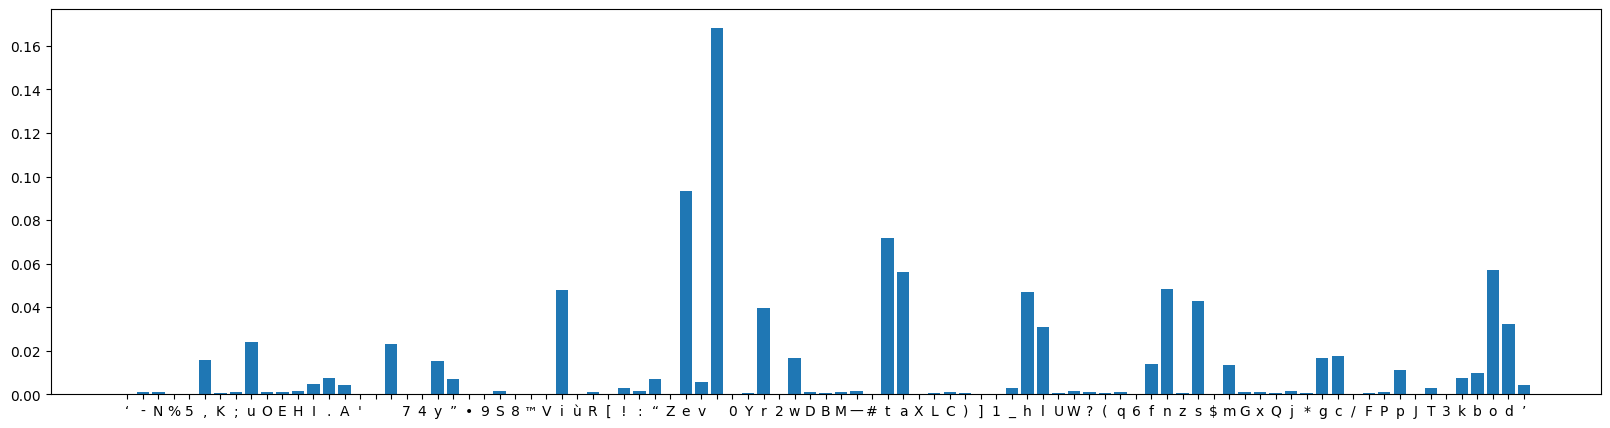

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.bar(range(len(probabilities)), list(probabilities.values()), align="center")
plt.xticks(range(len(probabilities)), list(probabilities.keys()))

plt.show()

In [53]:
pmf = sorted([counts[c] / len(text) for c in chars], reverse=True)
huff = komm.HuffmanCode(pmf)

print(huff.codewords)

[(0, 0, 1), (1, 1, 1), (0, 1, 0, 0), (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 1), (1, 1, 0, 0), (1, 1, 0, 1), (0, 0, 0, 0, 1), (0, 0, 0, 1, 1), (0, 1, 1, 0, 0), (0, 1, 1, 0, 1), (1, 0, 1, 0, 1), (0, 0, 0, 0, 0, 1), (0, 1, 0, 1, 0, 0), (0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 0), (0, 1, 1, 1, 0, 0), (0, 1, 1, 1, 0, 1), (0, 1, 1, 1, 1, 1), (1, 0, 1, 0, 0, 1), (0, 0, 0, 1, 0, 0, 0), (0, 0, 0, 1, 0, 1, 0), (0, 1, 1, 1, 1, 0, 0), (0, 1, 1, 1, 1, 0, 1), (1, 0, 1, 0, 0, 0, 0), (1, 0, 1, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 0), (0, 0, 0, 1, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1, 0, 0), (0, 1, 0, 1, 1, 1, 0, 1), (0, 0, 0, 0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 1, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 0, 0, 1, 1, 0), (0, 0, 0, 0, 0, 0, 1, 1, 0, 0), (0, 0, 0, 0, 0, 0, 1, 1, 0, 1), (0, 0, 0, 1, 0, 0, 1, 0, 1, 0), (0, 0, 0, 1, 0, 0, 1, 1, 0, 0), (0, 0, 0, 1, 0, 0, 1, 1, 0, 1), (0, 0, 0, 1, 0, 0, 1, 1, 1, 0), (0, 0, 0, 1, 0, 1, 1, 1, 0, 0),

In [78]:
indexes = {c: i for i, c in enumerate(chars)}
indexed_text = [indexes[c] for c in text]
huff_encoded = huff.encode(indexed_text)

# save into bin file

ValueError: cannot reshape array of size 1775495 into shape (8)